<a href="https://github.com/panstenos/Melanoma-Detection-using-CNNs/blob/main/Notebooks/Melanoma_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Description**

Welcome! This dataset, comprising 13,900 meticulously curated images, is a valuable resource for advancing the field of dermatology and computer-aided diagnostics. Dive into the intricate world of melanoma, where every pixel holds the potential to redefine early detection.

### **Context**

Melanoma, a deadly form of skin cancer, demands prompt and accurate diagnosis. Leveraging state-of-the-art technology, this dataset empowers researchers and practitioners to develop robust machine-learning models capable of distinguishing between benign and malignant lesions. The images, uniformly sized at 224 x 224 pixels, offer a comprehensive view of melanoma's diverse manifestations.

### **Sources and Inspiration**

This dataset draws inspiration from the critical need for advanced diagnostic tools in dermatology. The images are compiled from diverse sources and showcase the intricate features that challenge traditional diagnostic methods. By sharing this dataset on Kaggle, we invite the global data science community to collaborate, innovate, and contribute towards developing reliable models for melanoma classification.

# Required Dependencies


In [59]:
import os

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
# models
from tensorflow.keras.applications.inception_v3 import InceptionV3

# plotting libraries
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# 1. Data Organization

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Melanoma Cancer Detection'
!unzip data.zip

# 2. EDA

In [61]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Melanoma Cancer Detection'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'Benign')
train_malignant_dir = os.path.join(train_dir, 'Malignant')
test_benign_dir = os.path.join(test_dir, 'Benign')
test_malignant_dir = os.path.join(test_dir, 'Malignant')

print('{} Benign Train Images'.format(len(os.listdir(train_benign_dir))))
print('{} Malignant Train Images'.format(len(os.listdir(train_malignant_dir))))
print('{} Benign Test Images'.format(len(os.listdir(test_benign_dir))))
print('{} Malignant Test Images'.format(len(os.listdir(test_malignant_dir))))

6289 Benign Train Images
5590 Malignant Train Images
1000 Benign Test Images
1000 Malignant Test Images


Sample bening melanoma image:


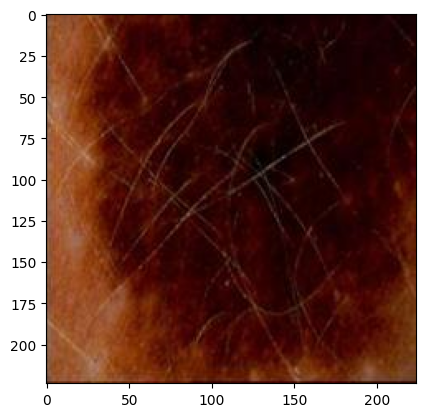


Sample malignant melanoma image:


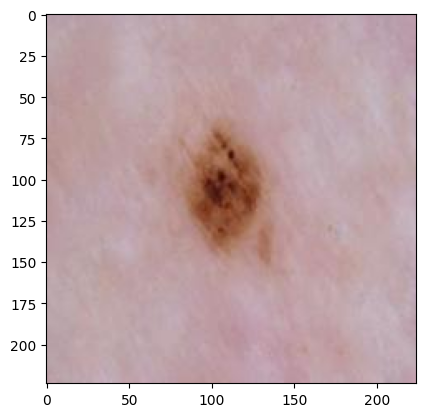

In [62]:
print("Sample bening melanoma image:")
plt.imshow(load_img(f"{os.path.join(train_benign_dir, os.listdir(train_benign_dir)[0])}"))
plt.show()

print("\nSample malignant melanoma image:")
plt.imshow(load_img(f"{os.path.join(train_malignant_dir, os.listdir(train_malignant_dir)[0])}"))
plt.show()

In [63]:
sample_image = load_img(os.path.join(train_benign_dir, os.listdir(train_benign_dir)[0]))

sample_array = img_to_array(sample_image)

print(sample_array.shape)

(224, 224, 3)


# 3. Data Preprocessing

In [64]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=train_dir, batch_size=20, class_mode='binary', target_size=(224,224))

Found 11879 images belonging to 2 classes.


In [65]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(directory=test_dir, batch_size=20, class_mode='binary', target_size=(224,224))

Found 2000 images belonging to 2 classes.


# 4. Modelling

## Callbacks

In [68]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95.0% accuracy -> Terminating Training")
      self.model.stop_training = True

In [72]:
callbacks = myCallback()

## a. CNN-1

In [69]:
model1 = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),

    Dense(1, activation='sigmoid')
])

model1.reset_states()

In [70]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 26, 26, 128)      

In [71]:
model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [73]:
history1 = model1.fit(train_generator, steps_per_epoch=25, epochs=100, verbose=1, validation_data=test_generator, validation_steps=5, callbacks=[callbacks])

Epoch 1/100
25/25 [==============================] - 74s 3s/step - loss: 0.6978 - accuracy: 0.5840 - val_loss: 0.6830 - val_accuracy: 0.5100
Epoch 2/100
25/25 [==============================] - 9s 375ms/step - loss: 0.6371 - accuracy: 0.6420 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 3/100
25/25 [==============================] - 9s 379ms/step - loss: 0.6169 - accuracy: 0.6440 - val_loss: 0.7736 - val_accuracy: 0.4800
Epoch 4/100
25/25 [==============================] - 8s 313ms/step - loss: 0.6173 - accuracy: 0.6840 - val_loss: 0.6942 - val_accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 9s 376ms/step - loss: 0.5965 - accuracy: 0.7120 - val_loss: 0.5938 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 10s 384ms/step - loss: 0.5772 - accuracy: 0.7300 - val_loss: 0.5702 - val_accuracy: 0.6900
Epoch 7/100
25/25 [==============================] - 8s 316ms/step - loss: 0.5662 - accuracy: 0.7080 - val_loss: 0.5420 - val_accuracy: 0.7200


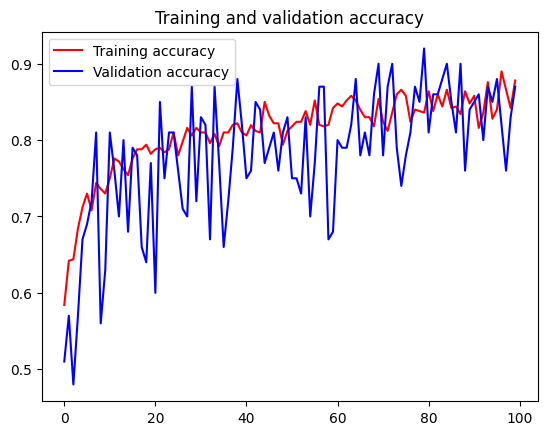

<Figure size 640x480 with 0 Axes>

In [74]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## b. AlexNet

In [75]:
model2 = tf.keras.models.Sequential([
    Conv2D(filters=96, kernel_size=(11,11), activation='relu', strides=(4, 4), input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.reset_states()

In [76]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, 12, 12, 384)       885120    
                                                                 
 conv2d_130 (Conv2D)         (None, 12, 12, 384)      

In [77]:
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [78]:
history2 = model2.fit(train_generator, steps_per_epoch=25, epochs=100, verbose=1, validation_data=test_generator, validation_steps=5, callbacks=[callbacks])

Epoch 1/100
25/25 [==============================] - 11s 313ms/step - loss: 0.6952 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.6200
Epoch 2/100
25/25 [==============================] - 9s 371ms/step - loss: 0.6957 - accuracy: 0.5580 - val_loss: 0.6842 - val_accuracy: 0.6400
Epoch 3/100
25/25 [==============================] - 9s 370ms/step - loss: 0.6741 - accuracy: 0.5840 - val_loss: 0.7195 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 8s 318ms/step - loss: 0.6857 - accuracy: 0.5740 - val_loss: 0.6870 - val_accuracy: 0.5400
Epoch 5/100
25/25 [==============================] - 9s 378ms/step - loss: 0.6814 - accuracy: 0.6060 - val_loss: 0.6409 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 10s 395ms/step - loss: 0.6807 - accuracy: 0.6320 - val_loss: 0.6644 - val_accuracy: 0.5900
Epoch 7/100
25/25 [==============================] - 8s 310ms/step - loss: 0.6273 - accuracy: 0.6560 - val_loss: 0.7765 - val_accuracy: 0.58

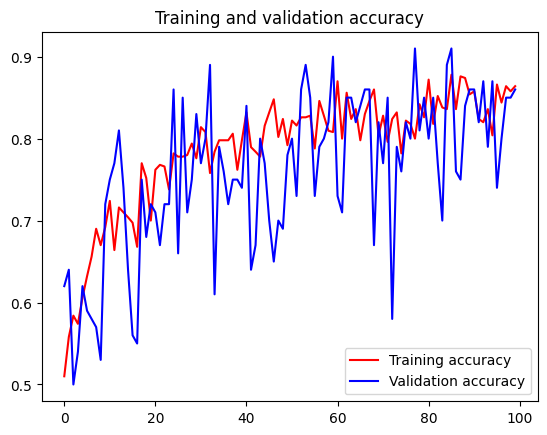

<Figure size 640x480 with 0 Axes>

In [79]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## InceptionV3

In [80]:
model3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model3.reset_states()

In [81]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_132 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_132[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

In [82]:
for layer in model3.layers:
  layer.trainable = False

In [83]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_132 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_132[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

In [84]:
# define which layers of the model to get
last_desired_layer = model3.get_layer('mixed8')
print(last_desired_layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1280), dtype=tf.float32, name=None), name='mixed8/concat:0', description="created by layer 'mixed8'")


In [85]:
x = Flatten()(last_desired_layer.output)
x = Dense(2024, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid') (x)

modelIV3M8 = Model(inputs=model3.inputs, outputs=x)

In [86]:
modelIV3M8.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [87]:
history3 = modelIV3M8.fit(train_generator, steps_per_epoch=25, epochs=100, verbose=1, validation_data=test_generator, validation_steps=5, callbacks=[callbacks])

Epoch 1/100
25/25 [==============================] - 19s 402ms/step - loss: 1.4148 - accuracy: 0.6720 - val_loss: 0.2648 - val_accuracy: 0.8800
Epoch 2/100
25/25 [==============================] - 9s 343ms/step - loss: 0.6593 - accuracy: 0.7040 - val_loss: 0.7500 - val_accuracy: 0.6200
Epoch 3/100
25/25 [==============================] - 10s 394ms/step - loss: 0.5342 - accuracy: 0.7560 - val_loss: 0.4545 - val_accuracy: 0.7700
Epoch 4/100
25/25 [==============================] - 10s 390ms/step - loss: 0.4860 - accuracy: 0.8020 - val_loss: 0.4223 - val_accuracy: 0.7900
Epoch 5/100
25/25 [==============================] - 8s 326ms/step - loss: 0.4274 - accuracy: 0.7940 - val_loss: 0.3014 - val_accuracy: 0.8400
Epoch 6/100
25/25 [==============================] - 9s 373ms/step - loss: 0.4854 - accuracy: 0.7980 - val_loss: 0.3007 - val_accuracy: 0.8500
Epoch 7/100
25/25 [==============================] - 10s 388ms/step - loss: 0.4119 - accuracy: 0.8160 - val_loss: 0.4688 - val_accuracy: 0.

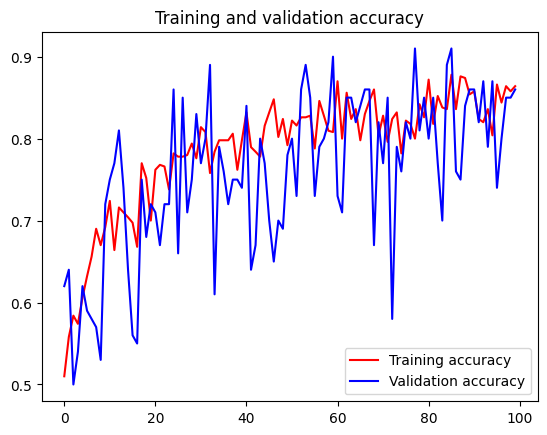

<Figure size 640x480 with 0 Axes>

In [88]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()